Salman_NUS_Week 8: Capstone Project Part 1

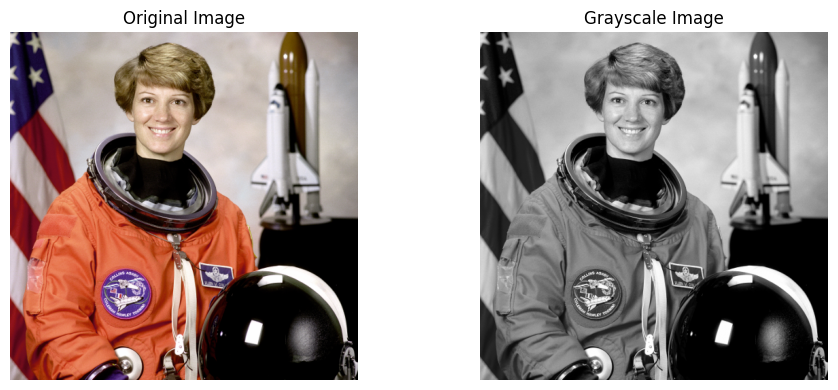

In [1]:
# Task 1: Import Libraries and Display Sample Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import data
from skimage.color import rgb2gray
from math import pi, cos

# Load a sample image from skimage and convert to grayscale
image = data.astronaut()
gray_image = rgb2gray(image)

# Display the input image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.tight_layout()
plt.show()

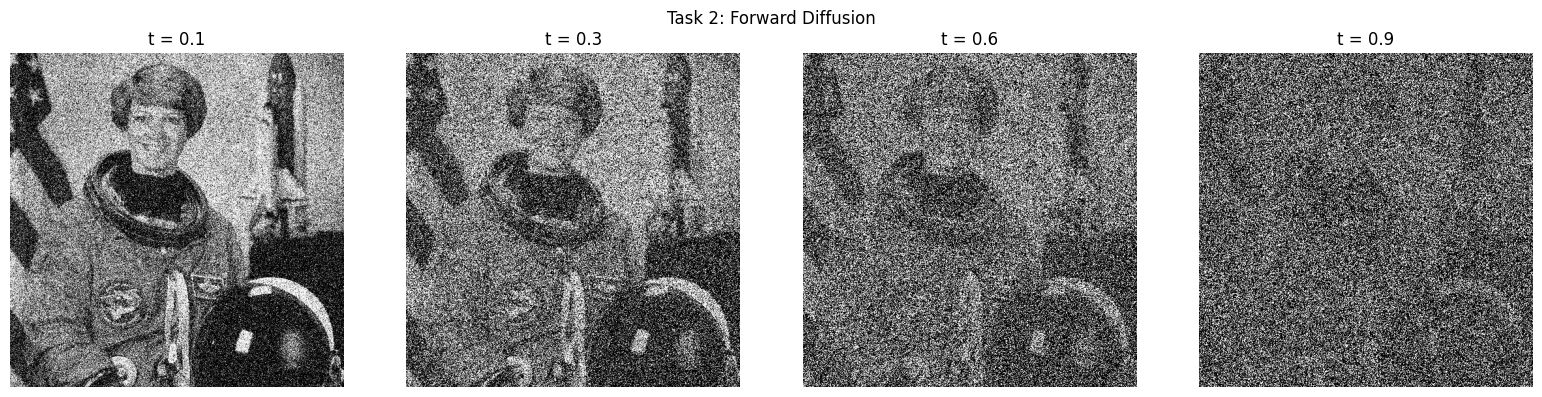

In [2]:
# Task 2: Simulate Forward Diffusion

# Function to add noise based on timestep t
def add_noise(img, t):
    noise = np.random.randn(*img.shape)
    noisy_img = np.sqrt(1 - t) * img + np.sqrt(t) * noise
    return np.clip(noisy_img, 0.0, 1.0)

# Apply forward diffusion for t values
timesteps = [0.1, 0.3, 0.6, 0.9]
noisy_images = [add_noise(gray_image, t) for t in timesteps]

# Visualize results
plt.figure(figsize=(16, 4))
for i, (img, t) in enumerate(zip(noisy_images, timesteps)):
    plt.subplot(1, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f't = {t}')
    plt.axis('off')
plt.suptitle('Task 2: Forward Diffusion')
plt.tight_layout()
plt.show()

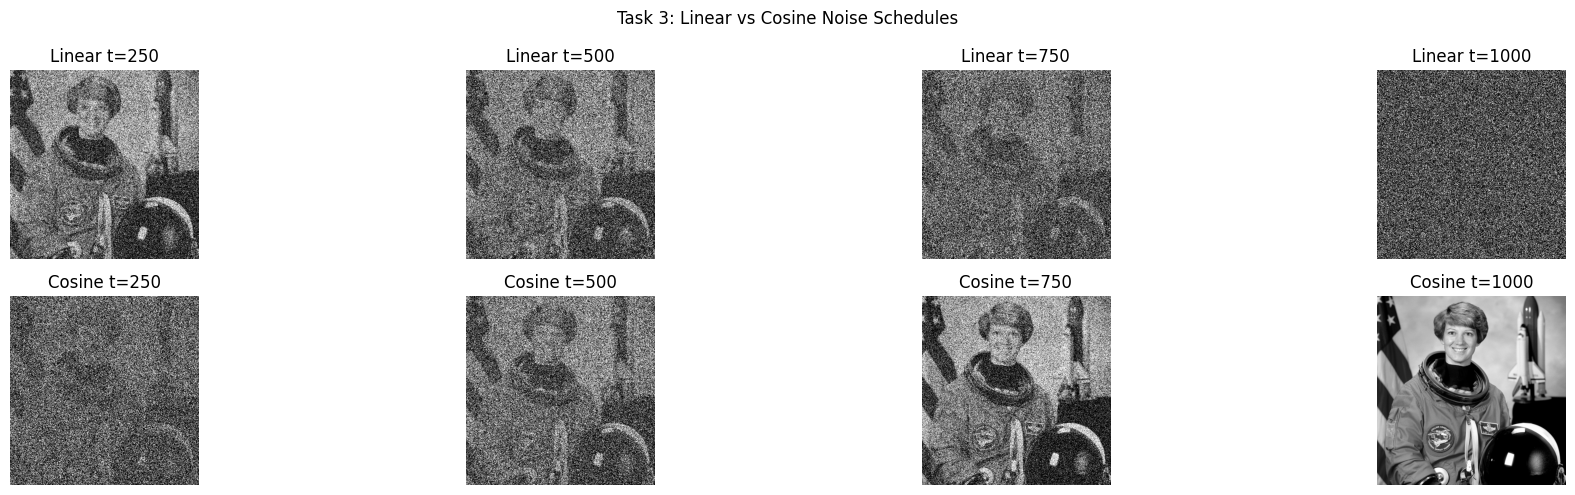

In [3]:
# Task 3: Compare Noise Schedules

def linear_schedule(t, T=1000):
    return t / T

def cosine_schedule(t, T=1000):
    return cos((t / T) * (pi / 2)) ** 2

T = 1000
t_vals = np.linspace(0, T, 5)[1:]  # skip t=0
linear_noised = [add_noise(gray_image, linear_schedule(t, T)) for t in t_vals]
cosine_noised = [add_noise(gray_image, cosine_schedule(t, T)) for t in t_vals]

# Plot comparison
fig, axes = plt.subplots(2, len(t_vals), figsize=(20, 5))
for i in range(len(t_vals)):
    axes[0, i].imshow(linear_noised[i], cmap='gray')
    axes[0, i].set_title(f'Linear t={int(t_vals[i])}')
    axes[0, i].axis('off')

    axes[1, i].imshow(cosine_noised[i], cmap='gray')
    axes[1, i].set_title(f'Cosine t={int(t_vals[i])}')
    axes[1, i].axis('off')

plt.suptitle('Task 3: Linear vs Cosine Noise Schedules')
plt.tight_layout()
plt.show()